In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lsst.geom

from lsst.rubintv.production.plotting.nightReportPlotBase import StarTrackerPlot

%matplotlib inline

# dayObs = 20230222
dayObs = 20230309
mdFilename = os.path.join('/project/rubintv/starTracker/sidecar_metadata', f'dayObs_{dayObs}.json')
metadata = pd.read_json(mdFilename).T
metadata = metadata.sort_index()

In [2]:
# any classes added to __all__ will automatically be added to the night
# report channel, with each being replotted for each image taken.
__all__ = ['RaDecAltAzOverTime',
           'DeltasPlot',
           'SourcesAndScatters',
           'AltAzCoverageTopDown',
           'InterCameraCoordOffset',  # as a string
           ]

COLORS = 'bgrcmyk'  # these get use in order to automatically give a series of colors for data series

class InterCameraCoordOffset(StarTrackerPlot):
    _PlotName = 'InterCameraCoordOffset'  # as a string
    _PlotGroup = 'Analysis'  # as a string

    def __init__(self,
                 dayObs,
                 locationConfig=None,
                 uploader=None):
        super().__init__(dayObs=dayObs,
                         plotName=self._PlotName,
                         plotGroup=self._PlotGroup,
                         locationConfig=locationConfig,
                         uploader=uploader)

    def plot(self, metadata):
        """Create a sample plot using data from the StarTracker page tables.

        Parameters
        ----------
        metadata : `pandas.DataFrame`
            The data from all three StarTracker page tables, as a dataframe.

        Returns
        -------
        success : `bool`
            Did the plotting succeed, and thus upload should be performed?
        """
        deltaRa = metadata["Delta Ra Arcsec"]
        deltaDec = metadata["Delta Dec Arcsec"]
        deltaRaWide = metadata["Delta Ra Arcsec wide"]
        deltaDecWide = metadata["Delta Dec Arcsec wide"]
        deltaRaDiff = deltaRa - deltaRaWide
        deltaDecDiff = deltaDec - deltaDecWide
        deltaAlt = metadata["Delta Alt Arcsec"]
        deltaAz = metadata["Delta Az Arcsec"]
        deltaAltWide = metadata["Delta Alt Arcsec wide"]
        deltaAzWide = metadata["Delta Az Arcsec wide"]
        deltaAltDiff = deltaAlt - deltaAltWide
        deltaAzDiff = deltaAz - deltaAzWide
        fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        fig.subplots_adjust(hspace=0)
        ax[0].plot(deltaRaDiff, label=r"intercam $\Delta$Ra")
        ax[0].plot(deltaDecDiff, label=r"intercam $\Delta$Dec")
        ax[0].legend(loc="lower right")
        ax[0].set_title(r"Narrow ($\Delta$Ra, $\Delta$Dec) - Wide ($\Delta$Ra, $\Delta$Dec)")
        ax[0].set_ylabel("Arcsec", fontsize=13)
        ax[1].plot(deltaAltDiff, label="intercam $\Delta$Alt")
        ax[1].plot(deltaAzDiff, label="intercam $\Delta$Az")
        ax[1].set_title("Narrow ($\Delta$Alt, $\Delta$Az) - Wide ($\Delta$Alt, $\Delta$Az)")
        ax[1].set_ylabel(r"Arcsec ($\Delta$Alt, $\Delta$Az)", fontsize=13)
        ax2 = ax[1].twinx()
        ax2.plot(metadata["Alt"], label="Commanded Alt", alpha=0.3, color='g')
        lines1, labels1 = ax[1].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
        ax2.set_ylabel("Degrees (Commanded Alt)", fontsize=13)
        ax[1].set_xlabel("Sequence Number", fontsize=13)
        return True

In [3]:
# any classes added to __all__ will automatically be added to the night
# report channel, with each being replotted for each image taken.
__all__ = ['RaDecAltAzOverTime',
           'DeltasPlot',
           'SourcesAndScatters',
           'AltAzCoverageTopDown',
           'CameraDeltaRaDec',  # as a string
           ]

COLORS = 'bgrcmyk'  # these get use in order to automatically give a series of colors for data series

class CameraDeltaRaDec(StarTrackerPlot): 
    _PlotName = 'CameraDeltaRaDec'  # as a string
    _PlotGroup = 'Analysis'  # as a string

    def __init__(self,
                 dayObs,
                 locationConfig=None,
                 uploader=None):
        super().__init__(dayObs=dayObs,
                         plotName=self._PlotName,
                         plotGroup=self._PlotGroup,
                         locationConfig=locationConfig,
                         uploader=uploader)

    def plot(self, metadata):
        """Create a sample plot using data from the StarTracker page tables.

        Parameters
        ----------
        metadata : `pandas.DataFrame`
            The data from all three StarTracker page tables, as a dataframe.

        Returns
        -------
        success : `bool`
            Did the plotting succeed, and thus upload should be performed?
        """
        deltaRa = metadata["Delta Ra Arcsec"]
        deltaDec = metadata["Delta Dec Arcsec"]
        deltaRaWide = metadata["Delta Ra Arcsec wide"]
        deltaDecWide = metadata["Delta Dec Arcsec wide"]
        fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        fig.subplots_adjust(hspace=0)
        ax[0].plot(deltaRa, label="$\Delta$Ra")
        ax[0].plot(deltaDec, label="$\Delta$Dec")
        ax[0].legend()
        ax[0].set_title("Narrow Cam")
        ax[0].set_ylabel("Arcsec", fontsize=13)
        ax[1].plot(deltaRaWide, label="$\Delta$Ra")
        ax[1].plot(deltaDecWide, label="$\Delta$Dec")
        ax[1].legend()
        ax[1].set_title("Wide Cam")
        ax[1].set_ylabel("Arcsec", fontsize=13)
        ax[1].set_xlabel("Sequence Number", fontsize=13)
        return True

In [4]:
# any classes added to __all__ will automatically be added to the night
# report channel, with each being replotted for each image taken.
__all__ = ['RaDecAltAzOverTime',
           'DeltasPlot',
           'SourcesAndScatters',
           'AltAzCoverageTopDown',
           'CameraAzAltOffset',  # as a string
           ]

COLORS = 'bgrcmyk'  # these get use in order to automatically give a series of colors for data series

class CameraAzAltOffset(StarTrackerPlot): 
    _PlotName = 'CameraAzAltOffset'  # as a string
    _PlotGroup = 'Analysis'  # as a string

    def __init__(self,
                 dayObs,
                 locationConfig=None,
                 uploader=None):
        super().__init__(dayObs=dayObs,
                         plotName=self._PlotName,
                         plotGroup=self._PlotGroup,
                         locationConfig=locationConfig,
                         uploader=uploader)

    def plot(self, metadata):
        """Create a sample plot using data from the StarTracker page tables.

        Parameters
        ----------
        metadata : `pandas.DataFrame`
            The data from all three StarTracker page tables, as a dataframe.

        Returns
        -------
        success : `bool`
            Did the plotting succeed, and thus upload should be performed?
        """
        deltaAlt = metadata["Delta Alt Arcsec"]
        deltaAz = metadata["Delta Az Arcsec"]
        deltaAltWide = metadata["Delta Alt Arcsec wide"]
        deltaAzWide = metadata["Delta Az Arcsec wide"]
        fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        fig.subplots_adjust(hspace=0)
        ax[0].plot(deltaAlt, label=f"$\Delta$Alt")
        ax[0].plot(deltaAz, label="$\Delta$Az")
        ax[0].legend()
        ax[0].set_title("Narrow Cam")
        ax[0].set_ylabel("Arcsec", fontsize=13)
        ax[1].plot(deltaAltWide, label="$\Delta$Alt")
        ax[1].plot(deltaAzWide, label="$\Delta$Az")
        ax[1].legend()
        ax[1].set_title("Wide Cam")
        ax[1].set_ylabel("Arcsec", fontsize=13)
        ax[1].set_xlabel("Sequence Number", fontsize=13)
        return True

In [22]:
# any classes added to __all__ will automatically be added to the night
# report channel, with each being replotted for each image taken.
__all__ = ['RaDecAltAzOverTime',
           'DeltasPlot',
           'SourcesAndScatters',
           'AltAzCoverageTopDown',
           'CameraAngularOffset',  # as a string
           ]

COLORS = 'bgrcmyk'  # these get use in order to automatically give a series of colors for data series

class CameraAngularOffset(StarTrackerPlot): 
    _PlotName = 'CameraAngularOffset'  # as a string
    _PlotGroup = 'Analysis'  # as a string

    def __init__(self,
                 dayObs,
                 locationConfig=None,
                 uploader=None):
        super().__init__(dayObs=dayObs,
                         plotName=self._PlotName,
                         plotGroup=self._PlotGroup,
                         locationConfig=locationConfig,
                         uploader=uploader)

    def plot(self, metadata):
        """Create a sample plot using data from the StarTracker page tables.

        Parameters
        ----------
        metadata : `pandas.DataFrame`
            The data from all three StarTracker page tables, as a dataframe.

        Returns
        -------
        success : `bool`
            Did the plotting succeed, and thus upload should be performed?
        """
        df = metadata[["Calculated Ra", "Calculated Dec", "Calculated Az", "Calculated Alt", 
               "Calculated Ra wide", "Calculated Dec wide", "Calculated Az wide", "Calculated Alt wide"]]
        # Discards rows with a nan entry
        df = df.dropna()

        nRows = len(df)
        skySeparations = np.zeros(nRows)
        azAltSeparations = np.zeros(nRows)

        # Put the df indices into a numpy array for x-axis plotting later
        idxs = df.index.values.astype(int)

        # Iterate over df rows, make (Ra, Dec) and (Az, Alt) SpherePoints for both Cameras and Compute Angle
        for i, (idx, row) in enumerate(df.iterrows()):
            ra, dec, az, alt = row[0], row[1], row[2], row[3]
            raWide, decWide, azWide, altWide = row[4], row[5], row[6], row[7]

            skyPointNarrow = lsst.geom.SpherePoint(ra*lsst.geom.degrees, dec*lsst.geom.degrees)
            skyPointWide = lsst.geom.SpherePoint(raWide*lsst.geom.degrees, decWide*lsst.geom.degrees)

            azAltPointNarrow = lsst.geom.SpherePoint(az*lsst.geom.degrees, alt*lsst.geom.degrees)
            azAltPointWide = lsst.geom.SpherePoint(azWide*lsst.geom.degrees, altWide*lsst.geom.degrees)

            skySeparations[i] = skyPointNarrow.separation(skyPointWide).asArcseconds()
            azAltSeparations[i] = azAltPointNarrow.separation(azAltPointWide).asArcseconds()
            
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.plot(idxs, skySeparations, label="(Ra, Dec)")
        ax.plot(idxs, azAltSeparations, label="(Az, Alt)")
        ax.set_xlabel("Sequence Number", fontsize=13)
        ax.set_ylabel("Angular Offset (Arcsec)", fontsize=13)
        ax.set_title("Wide - Narrow Real Angular Offset", fontsize=15)
        ax.set_ylim([25, 75])
        ax2 = ax.twinx()
        ax2.plot(metadata["Alt"], label="Commanded Alt", alpha=0.3, color='g')
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
        ax2.set_ylabel("Commanded Alt (Degrees)", fontsize=13)
        ax.set_xlabel("Sequence Number", fontsize=13)
        
        return True

In [23]:
interCamera = InterCameraCoordOffset(dayObs)
deltaRaDec = CameraDeltaRaDec(dayObs)
azAlt = CameraAzAltOffset(dayObs)
angular = CameraAngularOffset(dayObs)

True

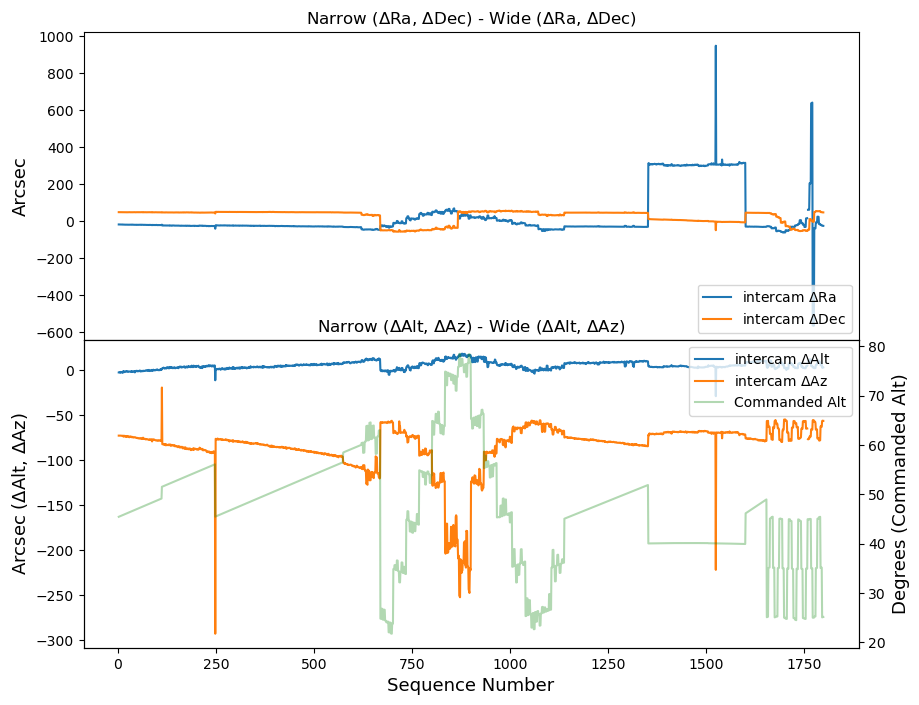

In [7]:
interCamera.plot(metadata)

True

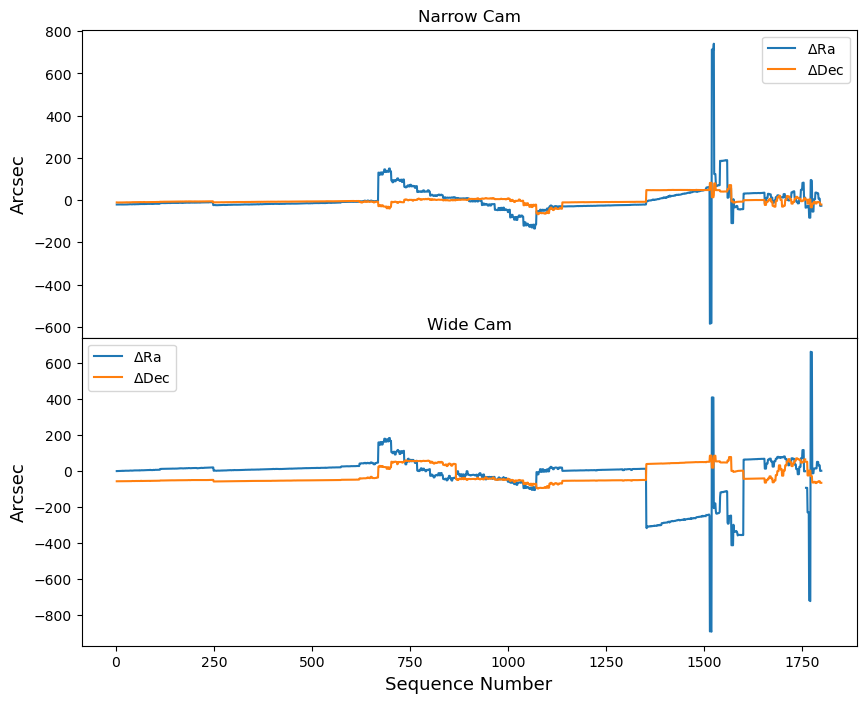

In [8]:
deltaRaDec.plot(metadata)

True

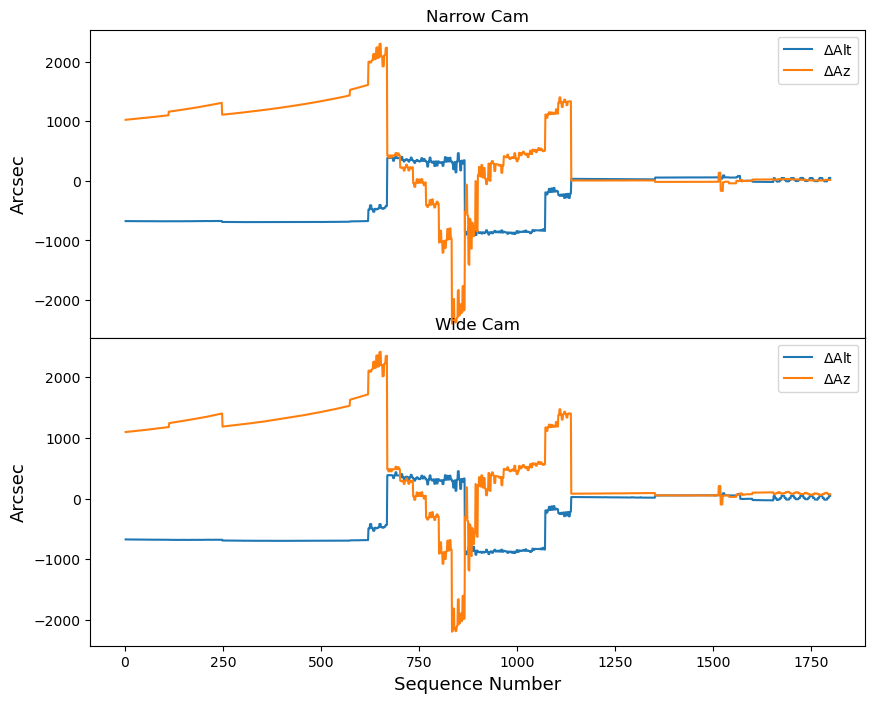

In [9]:
azAlt.plot(metadata)

True

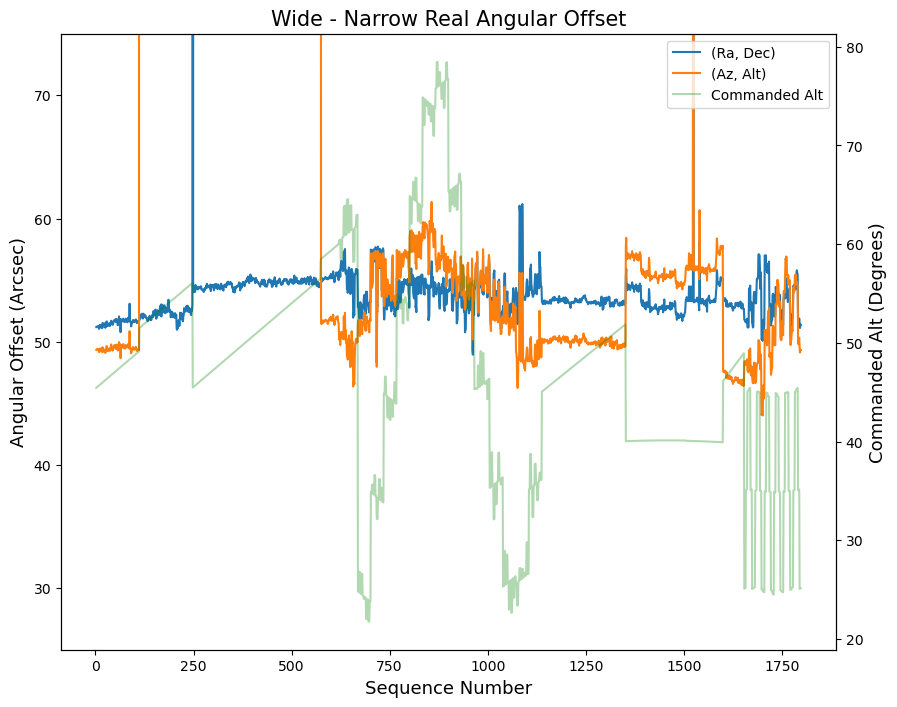

In [24]:
angular.plot(metadata)

In [10]:
metadata.columns

Index(['Exposure Time', 'MJD', 'Ra', 'Dec', 'Alt', 'Az', 'UTC', 'nSources',
       'nSources filtered', 'Exposure Time wide', 'MJD wide', 'Ra wide',
       'Dec wide', 'Alt wide', 'Az wide', 'UTC wide', 'nSources wide',
       'nSources filtered wide', 'Calculated Ra', 'Calculated Dec',
       'Calculated Alt', 'Calculated Az', 'Delta Ra Arcsec',
       'Delta Dec Arcsec', 'Delta Alt Arcsec', 'Delta Az Arcsec',
       'Delta Rot Arcsec', 'RMS scatter arcsec', 'RMS scatter pixels',
       'Calculated Ra wide', 'Calculated Dec wide', 'Calculated Alt wide',
       'Calculated Az wide', 'Delta Ra Arcsec wide', 'Delta Dec Arcsec wide',
       'Delta Alt Arcsec wide', 'Delta Az Arcsec wide',
       'Delta Rot Arcsec wide', 'RMS scatter arcsec wide',
       'RMS scatter pixels wide'],
      dtype='object')

In [11]:
calculatedAzWide, calculatedAltWide, calculatedRaWide, calculatedDecWide = metadata["Calculated Az wide"], metadata["Calculated Alt wide"], metadata["Calculated Ra wide"], metadata["Calculated Dec wide"]
calculatedAzNarrow, calculatedAltNarrow, calculatedRaNarrow, calculatedDecNarrow = metadata["Calculated Az"], metadata["Calculated Alt"], metadata["Calculated Ra"], metadata["Calculated Dec"]
az, alt, ra, dec = metadata["Az"], metadata["Alt"], metadata["Ra"], metadata["Dec"]
azWide, altWide, raWide, decWide = metadata["Az wide"], metadata["Alt wide"], metadata["Ra wide"], metadata["Dec wide"]

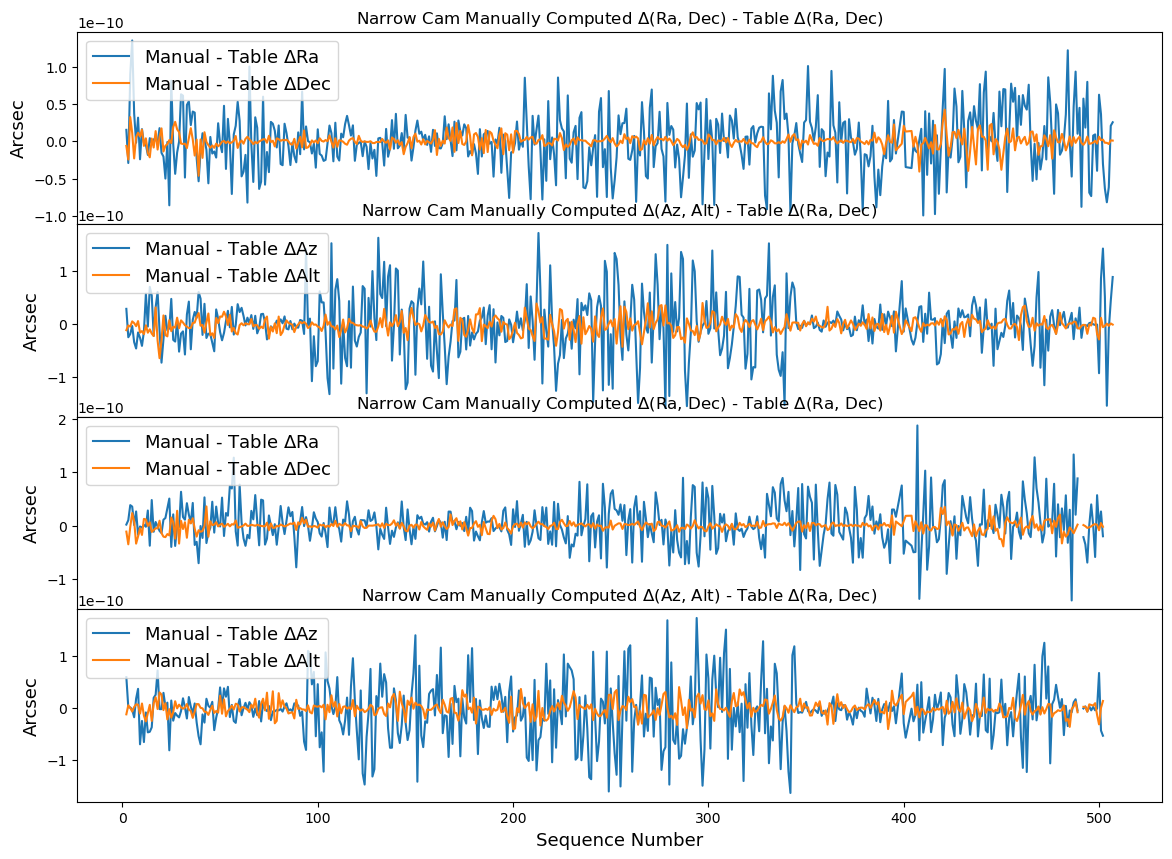

In [12]:
fig, ax = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
fig.subplots_adjust(hspace=0)

manualDeltaRa = (calculatedRaNarrow - ra) * 3600
manualDeltaDec = (calculatedDecNarrow - dec) * 3600
manualDeltaAlt = (calculatedAltNarrow - alt) * 3600
manualDeltaAz = (calculatedAzNarrow - az) * 3600
manualDeltaRaWide = (calculatedRaWide - raWide) * 3600
manualDeltaDecWide = (calculatedDecWide - decWide) * 3600
manualDeltaAltWide = (calculatedAltWide - altWide) * 3600
manualDeltaAzWide = (calculatedAzWide - azWide) * 3600

tableDeltaRa = metadata["Delta Ra Arcsec"]
tableDeltaDec = metadata["Delta Dec Arcsec"]
tableDeltaAlt = metadata["Delta Alt Arcsec"]
tableDeltaAz = metadata["Delta Az Arcsec"]
tableDeltaRaWide = metadata["Delta Ra Arcsec wide"]
tableDeltaDecWide = metadata["Delta Dec Arcsec wide"]
tableDeltaAltWide = metadata["Delta Alt Arcsec wide"]
tableDeltaAzWide = metadata["Delta Az Arcsec wide"]

ax[0].plot(manualDeltaRa - tableDeltaRa, label="Manual - Table $\Delta$Ra")
ax[0].plot(manualDeltaDec - tableDeltaDec, label="Manual - Table $\Delta$Dec")
ax[0].legend(fontsize=13)
ax[0].set_ylabel("Arcsec", fontsize=13)
ax[0].set_title("Narrow Cam Manually Computed $\Delta$(Ra, Dec) - Table $\Delta$(Ra, Dec)")

ax[1].plot(manualDeltaAz - tableDeltaAz, label="Manual - Table $\Delta$Az")
ax[1].plot(manualDeltaAlt - tableDeltaAlt, label="Manual - Table $\Delta$Alt")
ax[1].legend(fontsize=13)
ax[1].set_ylabel("Arcsec", fontsize=13)
ax[1].set_title("Narrow Cam Manually Computed $\Delta$(Az, Alt) - Table $\Delta$(Ra, Dec)")

ax[2].plot(manualDeltaRaWide - tableDeltaRaWide, label="Manual - Table $\Delta$Ra")
ax[2].plot(manualDeltaDecWide - tableDeltaDecWide, label="Manual - Table $\Delta$Dec")
ax[2].legend(fontsize=13)
ax[2].set_ylabel("Arcsec", fontsize=13)
ax[2].set_title("Narrow Cam Manually Computed $\Delta$(Ra, Dec) - Table $\Delta$(Ra, Dec)")

ax[3].plot(manualDeltaAzWide - tableDeltaAzWide, label="Manual - Table $\Delta$Az")
ax[3].plot(manualDeltaAltWide - tableDeltaAltWide, label="Manual - Table $\Delta$Alt")
ax[3].legend(fontsize=13)
ax[3].set_ylabel("Arcsec", fontsize=13)
ax[3].set_xlabel("Sequence Number", fontsize=13)
ax[3].set_title("Narrow Cam Manually Computed $\Delta$(Az, Alt) - Table $\Delta$(Ra, Dec)")

fig.savefig("plots/Manual_table_astrometry_diffs.png")
plt.show()

In [14]:
def computeAngle(point1, point2):
    # Great Circle Distance
    (long1, lat1) = point1
    (long2, lat2) = point2
    angle = np.arccos(np.sin(lat1) * np.sin(lat2) + 
                      np.cos(lat1) * np.cos(lat2) * 
                      np.cos(long1 - long2))
    return angle